# Debug 3D
## Run Function

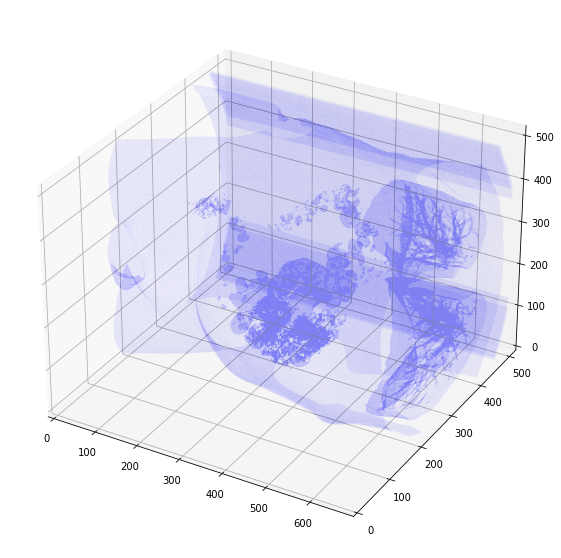

In [6]:


def run(gt,pr,voxelsize,name):
    eval_seg.reload()
    global mme, ev,d
    # view(gt,pr,voxelsize,name)
    
    
def view1(ct,gt,pr,spacing,name):
    import k3d
    hasz=1
    plot = k3d.plot(grid=[0, gt.shape[0], 0, gt.shape[1], 0, gt.shape[2]], name=name, grid_auto_fit=False,camera_auto_fit=hasz)
    plot.display()
    v= k3d.voxels(ct.astype(np.uint8), opacity=0.3, compression_level=9, name='ct', group='ct',scaling=spacing)
    v.visible=1
    v.outlines=False
    plot+=v
    
    
def view(ct,gt,pr,spacing,name):
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    from skimage import measure
    import matplotlib.pyplot as plt
    image=ct
    threshold=-300
    p = image.transpose(2,1,0)
    verts, faces, normals, values = measure.marching_cubes(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()
    
view(ct,gt,pr,voxelsize,name)

# CT Selector

In [2]:
from ipywidgets import interact,IntSlider
import os 
import pandas as pd
from auto_profiler import Profiler
import numpy as np
root='datasets/alg_out/'
root_ct='datasets/ct'
root_out='results'
import eval_seg
eval_seg.reload()


@interact
def selectData(dataset=['Task001_LiverTumor','Task002_Pancreas','Task003_Multiorgan']):
    @interact
    # def fileviewer(file=sorted(os.listdir(f'{root}/{dataset}/GroundTruth'))):
    def fileviewer(file=sorted([f.replace('_0000.','.') for f in os.listdir(f'{root_ct}/{dataset}/')])):       
        # file='train_330.nii.gz'
        gt_orig,voxelsize_orig=eval_seg.io.read_nib(f'{root}/{dataset}/GroundTruth/{file}')
        print(voxelsize_orig)
        
        ct_orig,_=eval_seg.io.read_nib(f'{root_ct}/{dataset}/{file}'.replace('.nii.gz','_0000.nii.gz'))
        ct_orig = gt_orig if ct_orig is None else ct_orig 
    
        gtmax=(gt_orig.sum(axis=2).sum(axis=1).argmax(),gt_orig.sum(axis=2).sum(axis=0).argmax(),gt_orig.sum(axis=1).sum(axis=0).argmax())      
        # eval_seg.ui.ortho_slicer(ct_orig,{'gt':gt_orig},gtmax,spacing=voxelsize_orig)

            
        @interact
        def fileviewer2(typ=['CE','Dice','DiceCE','DiceFocal','DiceTopK10','TopK10']):
                pr_orig,pr_voxel_size = eval_seg.io.read_nib(f'{root}/{dataset}/{typ}/{file}')
                if (voxelsize_orig!=pr_voxel_size).any():
                    raise Error('voxel sizes are different')
                # global name
                name_orig=f'{dataset}-{file}-{typ}'
                # eval_seg.ui.ortho_slicer(ct_orig,{typ:pr_orig},gtmax,spacing=voxelsize_orig)
                # run(gt_orig,pr_orig,voxelsize_orig,name)
                global ct,gt,pr,voxelsize,name
                ct,gt,pr,voxelsize,name=ct_orig,gt_orig,pr_orig,voxelsize_orig,name_orig
                view(ct_orig,gt_orig,pr_orig,voxelsize_orig,name)
                                


interactive(children=(Dropdown(description='dataset', options=('Task001_LiverTumor', 'Task002_Pancreas', 'Task…